In [ ]:
# Install required libraries
!pip install nlp-id pandas matplotlib seaborn nltk

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import string

# Import correct modules from nlp-id
from nlp_id.tokenizer import Tokenizer, PhraseTokenizer
from nlp_id.postag import PosTag
from nlp_id.stopword import StopWord
from nlp_id.lemmatizer import Lemmatizer

In [ ]:
# Initialize the required classes
tokenizer = Tokenizer()
phrase_tokenizer = PhraseTokenizer()
postagger = PosTag()
stopword = StopWord()
lemmatizer = Lemmatizer()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


postagger_v10.pkl:   0%|          | 0.00/282M [00:00<?, ?B/s]

In [ ]:
import nltk

# Download the 'punkt_tab' data for sentence tokenization
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# 1. Text Preprocessing Pipeline
print("1. Text Preprocessing Pipeline")

def preprocess_text(text):
    """Basic preprocessing pipeline for Indonesian text"""
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove extra whitespace
    text = ' '.join(text.split())

    # Tokenization
    tokens = tokenizer.tokenize(text)

    # Remove stopwords
    tokens = [token for token in tokens if token not in stopword.get_stopword()]

    # Lemmatization
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    return tokens

1. Text Preprocessing Pipeline


In [ ]:
# Example texts
texts = [
    """
    Pemrosesan Bahasa Alami (NLP) adalah bidang ilmu komputer dan kecerdasan buatan
    yang berfokus pada interaksi antara komputer dan bahasa manusia.
    """,
    """
    Gw suka bgt sama teknologi NLP nih, keren banget aplikasinya!
    """,
    """
    Para peneliti sedang mengembangkan algoritma baru untuk meningkatkan akurasi.
    """
]

In [ ]:
print("\nText Preprocessing Examples:")
for i, text in enumerate(texts, 1):
    print(f"\nExample {i}:")
    print("Original:", text.strip())
    preprocessed = preprocess_text(text)
    print("Preprocessed:", preprocessed)



Text Preprocessing Examples:

Example 1:
Original: Pemrosesan Bahasa Alami (NLP) adalah bidang ilmu komputer dan kecerdasan buatan 
    yang berfokus pada interaksi antara komputer dan bahasa manusia.
Preprocessed: ['proses', 'bahasa', 'alami', 'nlp', 'bidang', 'ilmu', 'komputer', 'cerdas', 'buat', 'fokus', 'interaksi', 'komputer', 'bahasa', 'manusia']

Example 2:
Original: Gw suka bgt sama teknologi NLP nih, keren banget aplikasinya!
Preprocessed: ['gw', 'suka', 'bgt', 'teknologi', 'nlp', 'nih', 'keren', 'aplikasi']

Example 3:
Original: Para peneliti sedang mengembangkan algoritma baru untuk meningkatkan akurasi.
Preprocessed: ['teliti', 'kembang', 'algoritma', 'tingkat', 'akurasi']


In [ ]:
# 2. POS Tagging
print("\n2. POS Tagging (Part of Speech)")
text_for_pos = "Saya sedang belajar pemrosesan bahasa alami di universitas."
# Ensure tokens is a string
tokens = " ".join(tokenizer.tokenize(text_for_pos))
# Joining the tokens into a single string

pos_tags = postagger.get_pos_tag(tokens)

print("\nPOS Tagging Results:")
for token, tag in pos_tags:
    print(f"{token}: {tag}")


2. POS Tagging (Part of Speech)

POS Tagging Results:
Saya: PR
sedang: ADV
belajar: VB
pemrosesan: NN
bahasa: NN
alami: VB
di: IN
universitas: NN
.: SYM


In [ ]:
# 3. Phrase Tokenization
print("\n3. Phrase Tokenization Example")
text_for_phrase = "Universitas Indonesia adalah kampus terbaik di Jakarta."
phrases = phrase_tokenizer.tokenize(text_for_phrase)
print("\nPhrase Tokenization Results:")
print(phrases)


3. Phrase Tokenization Example

Phrase Tokenization Results:
['Universitas Indonesia', 'adalah', 'kampus terbaik', 'di', 'Jakarta', '.']


In [ ]:
# 4. Word Frequency Analysis with Preprocessing
print("\n4. Word Frequency Analysis")

def analyze_word_frequency(texts):
    all_tokens = []
    for text in texts:
        tokens = preprocess_text(text)
        all_tokens.extend(tokens)

    return Counter(all_tokens)


4. Word Frequency Analysis


In [ ]:
# Create a larger sample text for analysis
sample_texts = [
    "Teknologi NLP semakin berkembang di Indonesia.",
    "Para peneliti terus mengembangkan model bahasa yang lebih baik.",
    "Aplikasi berbasis NLP sangat membantu dalam pekerjaan sehari-hari.",
    "Preprocessing teks adalah langkah penting dalam NLP.",
    "Banyak perusahaan menggunakan NLP untuk analisis sentimen."
]

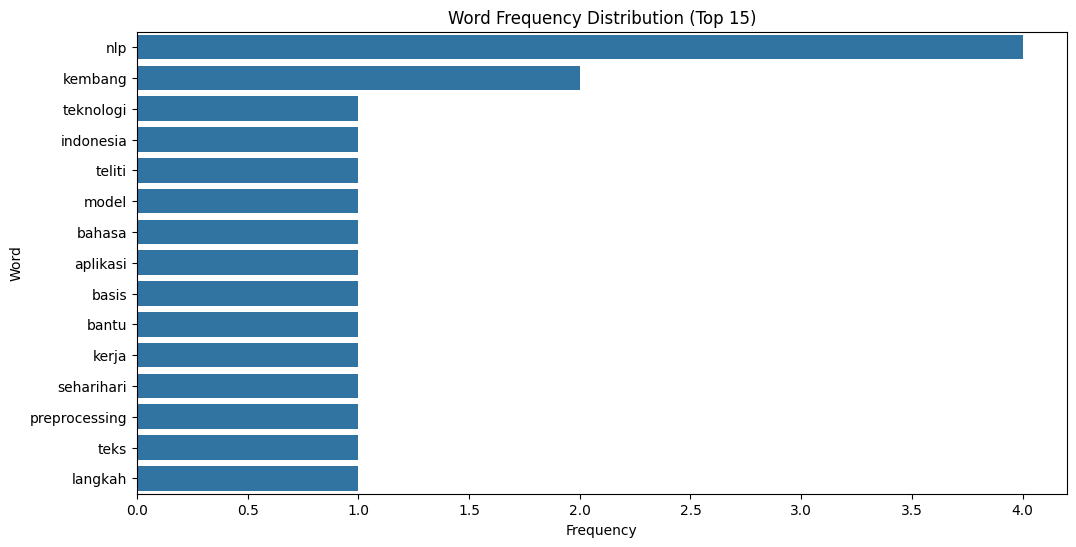

In [ ]:
word_freq = analyze_word_frequency(sample_texts)

# Visualize word frequency
plt.figure(figsize=(12, 6))
word_freq_df = pd.DataFrame(word_freq.most_common(15), columns=['Word', 'Frequency'])
sns.barplot(x='Frequency', y='Word', data=word_freq_df)
plt.title("Word Frequency Distribution (Top 15)")
plt.show()

In [ ]:
# 5. Stopword Analysis
print("\n5. Stopword Analysis")
print("\nSample of Indonesian stopwords:")
print(list(stopword.get_stopword())[:20])



5. Stopword Analysis

Sample of Indonesian stopwords:
['ada', 'adalagi', 'adalah', 'adanya', 'adapun', 'agak', 'agak-agak', 'agaknya', 'agar', 'aja', 'akan', 'akankah', 'akankan', 'akhir', 'akhir-akhirnya', 'akhirannya', 'akhiri', 'akhirinya', 'akhirnya', 'aku']


In [ ]:
# 6. Lemmatization Example
print("\n6. Lemmatization Example")
words_to_lemmatize = [
    "memakan", "bermain", "berlari", "menulis", "membaca",
    "mempelajari", "mengembangkan", "bekerja", "berjalan"
]


6. Lemmatization Example


In [ ]:
print("\nLemmatization Results:")
for word in words_to_lemmatize:
    lemma = lemmatizer.lemmatize(word)
    print(f"{word} -> {lemma}")



Lemmatization Results:
memakan -> makan
bermain -> main
berlari -> lari
menulis -> tulis
membaca -> baca
mempelajari -> ajar
mengembangkan -> kembang
bekerja -> kerja
berjalan -> jalan


In [ ]:
# 7. Text Analysis Example
print("\n7. Complete Text Analysis Example")

def analyze_text(text):
    print(f"Original Text: {text}")

    # Tokenization
    tokens = tokenizer.tokenize(text)
    print(f"Tokens: {tokens}")

    # POS Tagging
    # Convert tokens to a string if it's not already
    tokens_str = " ".join(tokens) if isinstance(tokens, list) else tokens
    pos_tags = postagger.get_pos_tag(tokens_str)  # Pass the string to get_pos_tag
    print("POS Tags:")
    for token, tag in pos_tags:
        print(f"  {token}: {tag}")

    # Remove stopwords
    filtered_tokens = [token for token in tokens if token not in stopword.get_stopword()]
    print(f"After stopword removal: {filtered_tokens}")

    # Lemmatization
    lemmatized = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    print(f"After lemmatization: {lemmatized}")


7. Complete Text Analysis Example


In [ ]:
sample_text = "Saya sedang mempelajari pemrosesan bahasa alami di universitas."
print("\nComplete Analysis of Sample Text:")
analyze_text(sample_text)


Complete Analysis of Sample Text:
Original Text: Saya sedang mempelajari pemrosesan bahasa alami di universitas.
Tokens: ['Saya', 'sedang', 'mempelajari', 'pemrosesan', 'bahasa', 'alami', 'di', 'universitas', '.']
POS Tags:
  Saya: PR
  sedang: ADV
  mempelajari: VB
  pemrosesan: NN
  bahasa: NN
  alami: VB
  di: IN
  universitas: NN
  .: SYM
After stopword removal: ['Saya', 'mempelajari', 'pemrosesan', 'bahasa', 'alami', 'universitas', '.']
After lemmatization: ['saya', 'ajar', 'proses', 'bahasa', 'alami', 'universitas', '']


In [ ]:
print("""
Tips Penggunaan nlp-id:
1. Tokenizer menyediakan dua opsi: basic tokenization dan phrase tokenization
2. POS Tagger memberikan informasi kelas kata dalam Bahasa Indonesia
3. Lemmatizer membantu menemukan bentuk dasar kata
4. Daftar stopword sudah disesuaikan dengan Bahasa Indonesia

Catatan:
- Sesuaikan urutan preprocessing sesuai kebutuhan
- Gunakan phrase_tokenizer untuk mengenali frasa
- Perhatikan konteks saat menghilangkan stopwords
- Lemmatization dapat membantu mengurangi variasi kata
""")


Tips Penggunaan nlp-id:
1. Tokenizer menyediakan dua opsi: basic tokenization dan phrase tokenization
2. POS Tagger memberikan informasi kelas kata dalam Bahasa Indonesia
3. Lemmatizer membantu menemukan bentuk dasar kata
4. Daftar stopword sudah disesuaikan dengan Bahasa Indonesia

Catatan:
- Sesuaikan urutan preprocessing sesuai kebutuhan
- Gunakan phrase_tokenizer untuk mengenali frasa
- Perhatikan konteks saat menghilangkan stopwords
- Lemmatization dapat membantu mengurangi variasi kata



Detailed Analysis of Each Text:

--- Analysis of Text 1 ---

Original Text: Teknologi NLP semakin berkembang di Indonesia.
After tokenization: ['Teknologi', 'NLP', 'semakin', 'berkembang', 'di', 'Indonesia', '.']
After stopword removal: ['Teknologi', 'NLP', 'berkembang', 'Indonesia', '.']
After lemmatization: ['teknologi', 'nlp', 'kembang', 'indonesia', '']

--- Analysis of Text 2 ---

Original Text: Para peneliti terus mengembangkan model bahasa yang lebih baik.
After tokenization: ['Para', 'peneliti', 'terus', 'mengembangkan', 'model', 'bahasa', 'yang', 'lebih', 'baik', '.']
After stopword removal: ['Para', 'peneliti', 'mengembangkan', 'model', 'bahasa', '.']
After lemmatization: ['para', 'teliti', 'kembang', 'model', 'bahasa', '']

--- Analysis of Text 3 ---

Original Text: Aplikasi berbasis NLP sangat membantu dalam pekerjaan sehari-hari.
After tokenization: ['Aplikasi', 'berbasis', 'NLP', 'sangat', 'membantu', 'dalam', 'pekerjaan', 'sehari-hari', '.']
After stopword removal: ['Apl

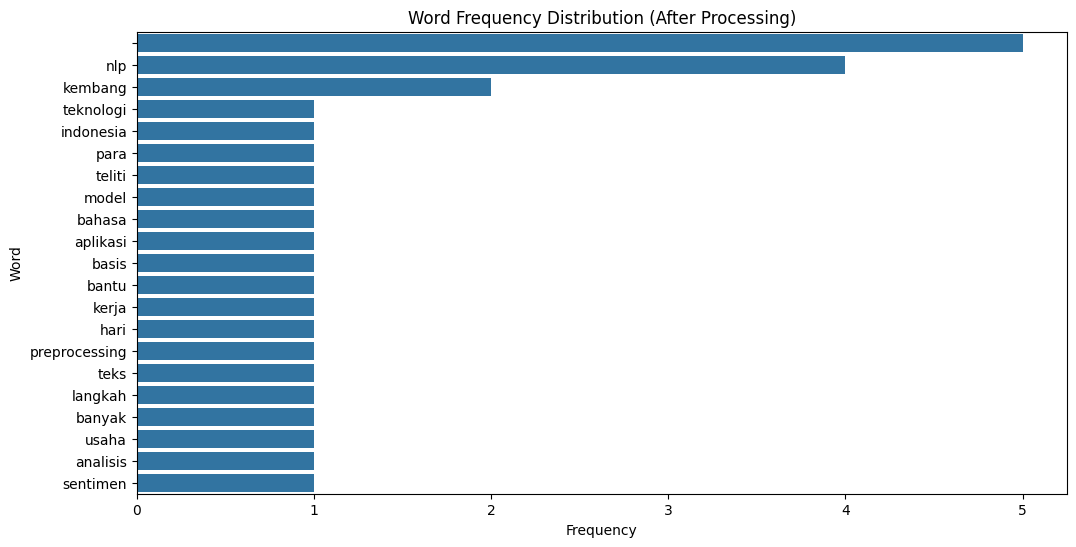


Summary Statistics:
Total number of original texts: 5
Total words after processing: 29
Unique words after processing: 21

Key Topics in the Texts:

Topic Distribution:
technology: 7 mentions
research: 2 mentions
business: 2 mentions


In [ ]:
# Detailed Analysis of Sample Indonesian Texts using nlp-id

# Import required libraries
from nlp_id.tokenizer import Tokenizer
from nlp_id.stopword import StopWord
from nlp_id.lemmatizer import Lemmatizer
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize required components
tokenizer = Tokenizer()
stopword = StopWord()
lemmatizer = Lemmatizer()

# Sample texts with explanations
sample_texts = [
    # Text 1: About NLP technology development
    "Teknologi NLP semakin berkembang di Indonesia.",

    # Text 2: About researchers and language models
    "Para peneliti terus mengembangkan model bahasa yang lebih baik.",

    # Text 3: About NLP applications
    "Aplikasi berbasis NLP sangat membantu dalam pekerjaan sehari-hari.",

    # Text 4: About text preprocessing
    "Preprocessing teks adalah langkah penting dalam NLP.",

    # Text 5: About business applications
    "Banyak perusahaan menggunakan NLP untuk analisis sentimen."
]

# Function to analyze a single text in detail
def detailed_text_analysis(text):
    print(f"\nOriginal Text: {text}")

    # Step 1: Tokenization
    tokens = tokenizer.tokenize(text)
    print(f"After tokenization: {tokens}")

    # Step 2: Remove stopwords
    stopwords = stopword.get_stopword()
    tokens_no_stop = [token for token in tokens if token not in stopwords]
    print(f"After stopword removal: {tokens_no_stop}")

    # Step 3: Lemmatization
    lemmatized = [lemmatizer.lemmatize(token) for token in tokens_no_stop]
    print(f"After lemmatization: {lemmatized}")

    return lemmatized

# Process all texts and collect statistics
print("Detailed Analysis of Each Text:")
all_processed_tokens = []
for i, text in enumerate(sample_texts, 1):
    print(f"\n--- Analysis of Text {i} ---")
    processed_tokens = detailed_text_analysis(text)
    all_processed_tokens.extend(processed_tokens)

# Word frequency analysis
print("\nWord Frequency Analysis:")
word_freq = Counter(all_processed_tokens)
print("\nMost common words and their frequencies:")
for word, freq in word_freq.most_common():
    print(f"{word}: {freq}")

# Visualize the results
plt.figure(figsize=(12, 6))
word_freq_df = pd.DataFrame(word_freq.most_common(), columns=['Word', 'Frequency'])
sns.barplot(x='Frequency', y='Word', data=word_freq_df)
plt.title("Word Frequency Distribution (After Processing)")
plt.show()

# Summary statistics
print("\nSummary Statistics:")
print(f"Total number of original texts: {len(sample_texts)}")
print(f"Total words after processing: {len(all_processed_tokens)}")
print(f"Unique words after processing: {len(set(all_processed_tokens))}")

# Topic analysis
print("\nKey Topics in the Texts:")
topic_categories = {
    'technology': ['teknologi', 'nlp', 'aplikasi', 'preprocessing'],
    'research': ['peneliti', 'model', 'mengembangkan', 'bahasa'],
    'business': ['perusahaan', 'pekerjaan', 'analisis', 'sentimen']
}

print("\nTopic Distribution:")
for topic, keywords in topic_categories.items():
    topic_count = sum(1 for token in all_processed_tokens if token.lower() in keywords)
    print(f"{topic}: {topic_count} mentions")